Kaggle Titanic competition

1. import right packages

In [1143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. import data

In [1144]:
df = pd.read_csv('C:/Users/Marc/Dropbox/01_Marc Arnold/Python Projects/06_Kaggle Competitions/01_Titanic/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Explore Data

In [1145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1146]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1147]:
df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Survived', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

distributions for numberic variables

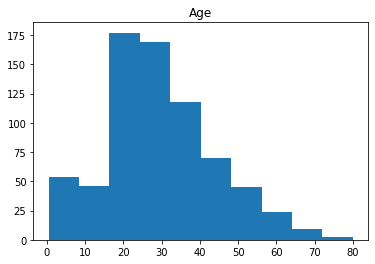

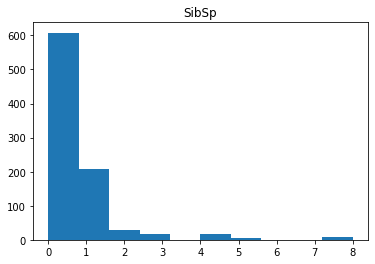

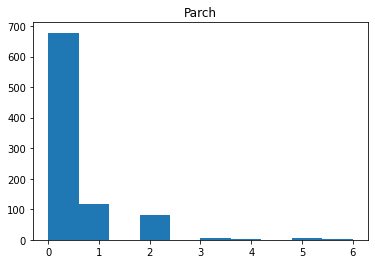

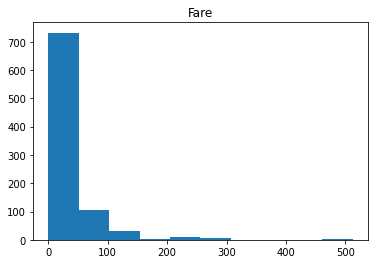

In [1148]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

check correlations

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

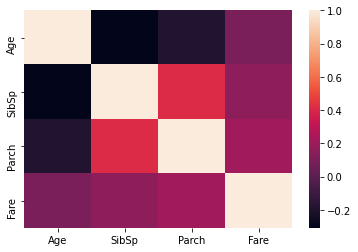

In [1149]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [1150]:
Cabin_raw = df.Cabin.value_counts()
Cabin_raw

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
E101           3
              ..
B19            1
A7             1
A5             1
C46            1
B4             1
Name: Cabin, Length: 147, dtype: int64

see how categorical features compare to survived

In [1151]:
pd.pivot_table(df, index = 'Survived', values =df_num.columns)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Show categorical values in graphs

c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

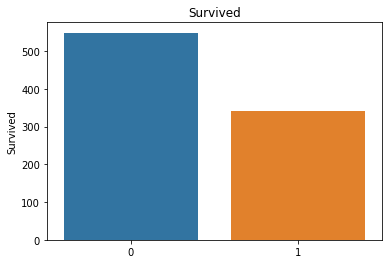

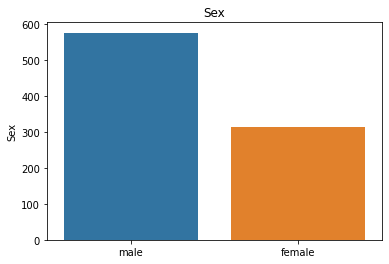

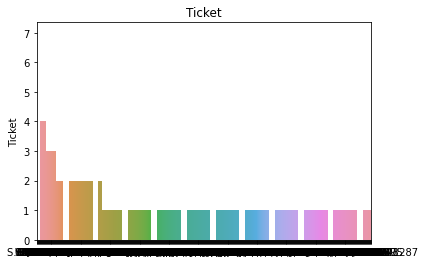

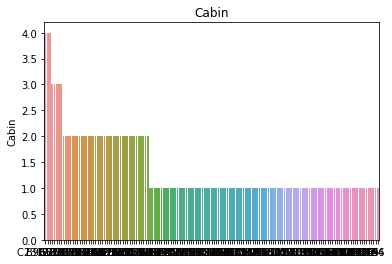

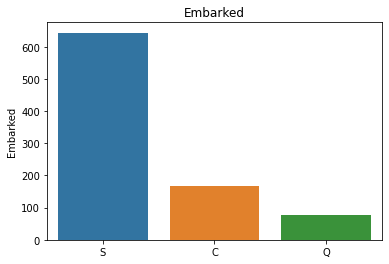

In [1152]:
for i in df_cat:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

pivot table for the categorical variables

In [1153]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket',aggfunc = 'count'))

print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket',aggfunc = 'count'))

print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket',aggfunc = 'count'))



Sex       female  male
Survived              
0             81   468
1            233   109
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


create different blocks of cabins: A,B,C..... and pivot

In [1154]:
df['Cabin_by_block'] = df.Cabin.str[0].replace(np.nan, 'NaN')

print(pd.pivot_table(df, index = 'Survived', columns = 'Cabin_by_block', values = 'Ticket',aggfunc = 'count'))

Cabin_by_block    A     B     C     D     E    F    G    NaN    T
Survived                                                         
0               8.0  12.0  24.0   8.0   8.0  5.0  2.0  481.0  1.0
1               7.0  35.0  35.0  25.0  24.0  8.0  2.0  206.0  NaN


See the different blocks of the ship and how many NaN there are for cabins

In [1155]:
Cabin_by_block_raw= df.Cabin_by_block.value_counts()
ppl_with_cabin = Cabin_by_block_raw.sum()
per_ppl_with_cabin = round((ppl_with_cabin / len(df.index))*100, ndigits = 2)

print('There are ' + str(ppl_with_cabin) + ' People with an associate cabin in the training set')
print('Hence, there are ' + str(per_ppl_with_cabin) + '% with a cabin in the training set')

There are 891 People with an associate cabin in the training set
Hence, there are 100.0% with a cabin in the training set


See which features still have null values, as ML predcitions handle them not very well

In [1156]:
df.dropna(subset =['Embarked'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    int64  
 2   Pclass          889 non-null    int64  
 3   Name            889 non-null    object 
 4   Sex             889 non-null    object 
 5   Age             712 non-null    float64
 6   SibSp           889 non-null    int64  
 7   Parch           889 non-null    int64  
 8   Ticket          889 non-null    object 
 9   Fare            889 non-null    float64
 10  Cabin           202 non-null    object 
 11  Embarked        889 non-null    object 
 12  Cabin_by_block  889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 97.2+ KB


imputing Age with its mean

In [1157]:
df.Age = df.Age.fillna(df.Age.mean())

In [1158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    int64  
 2   Pclass          889 non-null    int64  
 3   Name            889 non-null    object 
 4   Sex             889 non-null    object 
 5   Age             889 non-null    float64
 6   SibSp           889 non-null    int64  
 7   Parch           889 non-null    int64  
 8   Ticket          889 non-null    object 
 9   Fare            889 non-null    float64
 10  Cabin           202 non-null    object 
 11  Embarked        889 non-null    object 
 12  Cabin_by_block  889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 97.2+ KB


Dummyfyining

In [1159]:
df = pd.get_dummies(df, columns=['Cabin_by_block', 'Sex', 'Embarked'])
df.set_index('PassengerId', inplace = True)
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Cabin_by_block_A,...,Cabin_by_block_E,Cabin_by_block_F,Cabin_by_block_G,Cabin_by_block_NaN,Cabin_by_block_T,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,...,0,0,0,1,0,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,...,0,0,0,0,0,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,...,0,0,0,1,0,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,...,0,0,0,0,0,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,...,0,0,0,1,0,0,1,0,0,1


In [1160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            889 non-null    int64  
 1   Pclass              889 non-null    int64  
 2   Name                889 non-null    object 
 3   Age                 889 non-null    float64
 4   SibSp               889 non-null    int64  
 5   Parch               889 non-null    int64  
 6   Ticket              889 non-null    object 
 7   Fare                889 non-null    float64
 8   Cabin               202 non-null    object 
 9   Cabin_by_block_A    889 non-null    uint8  
 10  Cabin_by_block_B    889 non-null    uint8  
 11  Cabin_by_block_C    889 non-null    uint8  
 12  Cabin_by_block_D    889 non-null    uint8  
 13  Cabin_by_block_E    889 non-null    uint8  
 14  Cabin_by_block_F    889 non-null    uint8  
 15  Cabin_by_block_G    889 non-null    uint8  
 16  Cabin_by

Might be able to do something with the Ticket_ID, for now not touched though

Rename df to x_train, and load x_test
Create y_train

In [1161]:
y_train = pd.DataFrame(df.Survived)
x_train = df.drop(['Survived', 'Ticket', 'Name', 'Cabin'], axis = 1)

In [1162]:
x_test = df = pd.read_csv('C:/Users/Marc/Dropbox/01_Marc Arnold/Python Projects/06_Kaggle Competitions/01_Titanic/test.csv')

In [1163]:
y_train.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [1164]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_by_block_A,Cabin_by_block_B,Cabin_by_block_C,Cabin_by_block_D,Cabin_by_block_E,Cabin_by_block_F,Cabin_by_block_G,Cabin_by_block_NaN,Cabin_by_block_T,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,3,26.0,0,0,7.9250,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,0,0,0,0,0,0,1,0,0,1,0,0,1


Apply the same code to the test set as to the train set

In [1165]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1166]:
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1167]:
x_test['Cabin_by_block'] = x_test.Cabin.str[0].replace(np.nan, 'NaN')
x_test.Age = x_test.Age.fillna(x_test.Age.mean())
x_test.Age = x_test.Age.fillna(x_test.Age.mean())
x_test.Fare = x_test.Fare.fillna(x_test.Fare.mean())
x_test = pd.get_dummies(x_test, columns=['Cabin_by_block', 'Sex', 'Embarked'])
x_test.set_index('PassengerId', inplace = True)
x_test.drop(['Ticket', 'Name', 'Cabin'], axis = 1)

,Pclass,Age,SibSp,Parch,Fare,Cabin_by_block_A,Cabin_by_block_B,Cabin_by_block_C,Cabin_by_block_D,Cabin_by_block_E,Cabin_by_block_F,Cabin_by_block_G,Cabin_by_block_NaN,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,
892,3,34.50000,0,0,7.8292,0,0,0,0,0,0,0,1,0,1,0,1,0
893,3,47.00000,1,0,7.0000,0,0,0,0,0,0,0,1,1,0,0,0,1
894,2,62.00000,0,0,9.6875,0,0,0,0,0,0,0,1,0,1,0,1,0
895,3,27.00000,0,0,8.6625,0,0,0,0,0,0,0,1,0,1,0,0,1
896,3,22.00000,1,1,12.2875,0,0,0,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,30.27259,0,0,8.0500,0,0,0,0,0,0,0,1,0,1,0,0,1
1306,1,39.00000,0,0,108.9000,0,0,1,0,0,0,0,0,1,0,1,0,0
1307,3,38.50000,0,0,7.2500,0,0,0,0,0,0,0,1,0,1,0,0,1


Preparation for ML
Options:
- Gaussian Naive Bayes

import sklearn packages

In [1168]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


GNB

In [1169]:
gnb = GaussianNB()
gnb_cv = cross_val_score(gnb,x_train,y_train, cv = 5)
print(gnb_cv)
print(gnb_cv.mean())

[0.73595506 0.69662921 0.76966292 0.7752809  0.79661017]
0.7548276518758332


c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

LogReg

In [1170]:
lg = LogisticRegression(max_iter = 2000)
lg_cv = cross_val_score(lg,x_train,y_train, cv = 5)
print(lg_cv)
print(lg_cv.mean())

c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

[0.78651685 0.79775281 0.78089888 0.78651685 0.81355932]
0.7930489430584651


Tree

In [1171]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_cv = cross_val_score(dt,x_train,y_train, cv = 5)
print(dt_cv)
print(dt_cv.mean())

[0.74157303 0.7752809  0.83707865 0.78651685 0.83615819]
0.7953215260585285


KNN

In [1172]:
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn,x_train,y_train, cv = 5)
print(knn_cv)
print(knn_cv.mean())

[0.66292135 0.6741573  0.71348315 0.7247191  0.72316384]
0.6996889481368628


c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversi

Random Forest

In [1173]:
rf = RandomForestClassifier(random_state = 1)
rfcv = cross_val_score(rf,x_train,y_train, cv = 10)
print(rfcv)
print(rfcv.mean())

c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\marc\documents\github\02_python\01_titan

[0.7752809  0.7752809  0.76404494 0.84269663 0.85393258 0.79775281
 0.82022472 0.76404494 0.87640449 0.82954545]
0.8099208375893768


Support Vector Machine

In [1174]:
svc = SVC()
svc_cv = cross_val_score(svc,x_train,y_train, cv = 5)
print(svc_cv)
print(svc_cv.mean())

c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y

[0.59550562 0.71348315 0.68539326 0.68539326 0.68926554]
0.6738081635244081


Overview CV

In [1175]:
data = {'GNB': [gnb_cv.mean()], 'DT': [dt_cv.mean()], 'LogReg': [lg_cv.mean()], 'KNN':[knn_cv.mean()], 'RF': [rfcv.mean()], 'SVC': [svc_cv.mean()]}
CV_means = pd.DataFrame(data)
CV_means

,GNB,DT,LogReg,KNN,RF,SVC
0,0.754828,0.795322,0.793049,0.699689,0.809921,0.673808


Testing of RF as it has the best result in the cross validation

In [1176]:
clf = SVC()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)

c:\users\marc\documents\github\02_python\01_titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: could not convert string to float: 'Kelly, Mr. James'

Submission File

In [ ]:
submission = pd.DataFrame(prediction)